Things to do
- Preprocess images
- Load images
- Set up data for training
- Set up feature learning
- Add classification
- Receive video feed
- Process video feed



In [75]:
import os

import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical



### Setting the path to the dataset

In [76]:

import pathlib

data_dir = pathlib.Path("../kaggle/")
train_path = f"{data_dir}/Train/"
test_path = f"{data_dir}/"
print(os.listdir(data_dir))

['predictionTest', 'Train.csv', 'Test', 'test', 'meta', 'TestWithDirs', 'train', 'Meta', 'Meta.csv', 'Test.csv', 'Train']


### Creating the dataset

##### About the dataset
We chose to split the test folder into 80% for testing and 20% for validation


In [77]:
#TODO: We should consider trying out different batch sizes
import tensorflow as tf

data = []
labels = []

batch_size = 30
img_height = 32
img_width = 32
img_size = (img_height, img_width)
epochs = 15

class_names = {0: 'Speed limit (20km/h)',
               1: 'Speed limit (30km/h)',
               2: 'Speed limit (50km/h)',
               3: 'Speed limit (60km/h)',
               4: 'Speed limit (70km/h)',
               5: 'Speed limit (80km/h)',
               6: 'End of speed limit (80km/h)',
               7: 'Speed limit (100km/h)',
               8: 'Speed limit (120km/h)',
               9: 'No passing',
               10: 'No passing veh over 3.5 tons',
               11: 'Right-of-way at intersection',
               12: 'Priority road',
               13: 'Yield',
               14: 'Stop',
               15: 'No vehicles',
               16: 'Veh > 3.5 tons prohibited',
               17: 'No entry',
               18: 'General caution',
               19: 'Dangerous curve left',
               20: 'Dangerous curve right',
               21: 'Double curve',
               22: 'Bumpy road',
               23: 'Slippery road',
               24: 'Road narrows on the right',
               25: 'Road work',
               26: 'Traffic signals',
               27: 'Pedestrians',
               28: 'Children crossing',
               29: 'Bicycles crossing',
               30: 'Beware of ice/snow',
               31: 'Wild animals crossing',
               32: 'End speed + passing limits',
               33: 'Turn right ahead',
               34: 'Turn left ahead',
               35: 'Ahead only',
               36: 'Go straight or right',
               37: 'Go straight or left',
               38: 'Keep right',
               39: 'Keep left',
               40: 'Roundabout mandatory',
               41: 'End of no passing',
               42: 'End no passing veh > 3.5 tons'}

# train_ds = tf.keras.utils.image_dataset_from_directory(
#     "./../kaggle/Train/",
#     validation_split=0.2,
#     subset="training",
#     seed=505,
#     image_size=img_size,
#     shuffle=True,
#     batch_size=batch_size
# )

# validation_ds = tf.keras.utils.image_dataset_from_directory(
#     "./../kaggle/Train/",
#     validation_split=0.2,
#     subset="validation",
#     seed=505,
#     shuffle=True,
#     image_size=img_size,
#     batch_size=batch_size
# )

# print(validation_ds)
#
# num_classes = len(train_ds.class_names)
# class_names = train_ds.class_names

num_categories = len(os.listdir(train_path))
trimmed_dataset = []

def load_data(data_dir):
    images = list()
    labels = list()
    for category in range(num_categories):
        categories = os.path.join(data_dir, str(category))
        size = 0
        # pos = 0
        # sub_imgs = os.listdir(categories)
        # while size < len(sub_imgs) and size < 500:
        #     size+=1
        #     jmp = np.random.randint(1, 3)
        #     pos = (jmp * pos) % len(sub_imgs)
        #     rand_img = sub_imgs[pos]
        #     img = load_img(os.path.join(categories, rand_img), target_size=img_size)
        #     image_arr = img_to_array(img)
        #     images.append(image_arr)
        #     labels.append(category)
        # trimmed_dataset.append(size)

        for img in os.listdir(categories):
            size+=1
            if size > 500:
                break
            img = load_img(os.path.join(categories, img), target_size=img_size)
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    return images, labels

# import matplotlib.pyplot as plt
# For visualizing images in one batch
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(32):
#         ax = plt.subplot(15, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(train_ds.class_names[labels[i]])
#         plt.axis("off")
#


#### Plotting the amount of different data from the original dataset

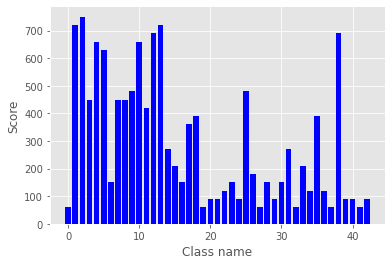

[ 0 37 32 27 41 19 40 39 29 24 20 21 42 36 34 22 30 28 23  6 16 26 15 33
 31]


In [78]:
arr = []
for i in range(0, 43):
    _, _, files = next(os.walk(f"../kaggle/TestWithDirs/{i}/"))
    arr.append(len(files))

plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(class_names)]
plt.bar(x_pos, arr, color="blue")
plt.xlabel("Class name")
plt.ylabel("Score")
plt.show()
twentyfive_lowest = np.argsort(arr)[:25]
print(twentyfive_lowest)




In [ ]:
from sklearn.model_selection import train_test_split


images, labels = load_data(train_path)
print(len(images))
print(trimmed_dataset)
# One hot encoding the labels
labels = to_categorical(labels)

# Splitting the dataset into training and test set
x_train, x_val, y_train, y_val = train_test_split(np.array(images), labels, test_size=0.2)
print(len(x_train))
print(len(x_val))
print(np.array(images).shape)

#### Plotting the amount of data after trimming the dataset

In [ ]:
plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(class_names)]
plt.bar(x_pos, trimmed_dataset, color="green")
plt.xlabel("Class name")
plt.ylabel("Score")
plt.show()
twentyfive_lowest = np.argsort(arr)[:25]



#### Preprocessing images

In [ ]:

from skimage.color import rgb2gray
from cv2 import cv2


def augment_imgs(imgs, p):
    """
    Performs a set of augmentations with with a probability p
    """
    from imgaug import augmenters as iaa
    augs =  iaa.SomeOf((2, 4),
          [
              iaa.Crop(px=(0, 4)), # crop images from each side by 0 to 4px (randomly chosen)
              iaa.Affine(scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}),
              iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}),
              iaa.Affine(rotate=(-45, 45)), # rotate by -45 to +45 degrees)
              iaa.Affine(shear=(-10, 10)) # shear by -10 to +10 degrees
          ])

    seq = iaa.Sequential([iaa.Sometimes(p, augs)])
    res = seq.augment_images(imgs)
    return res

#plt.imshow(images[0])
#x_train = augment_imgs(x_train, 1)
# x_val = augment_imgs(x_val, 1)

#x_train = rgb2gray(x_train)

plt.imshow(x_train[0])


### Setting up performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

#train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
#validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Training the model

In [ ]:
data_augmentation = keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal",
                                   input_shape=(img_height,
                                                img_width,
                                                3)),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
    ]
)

from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Activation, MaxPooling2D

validation_ds = (x_val, y_val)


model = tf.keras.Sequential()
model.add(data_augmentation)
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_categories, activation='softmax'))


# model = tf.keras.Sequential([
#     data_augmentation,
#     tf.keras.layers.Rescaling(1.0 / 255),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(rate=.3),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(720, activation='relu'),
#     tf.keras.layers.Dropout(rate=.5),
#     tf.keras.layers.Dense(num_categories, activation='softmax')
# ])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    #loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    # metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
    metrics=['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    validation_data=validation_ds,
    epochs=epochs,
    use_multiprocessing=True,
    workers=4
)

### Visualize the training

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Testing/Evaluating the model


#### Predicting the trained model

In [ ]:
import os
from keras_preprocessing.image import load_img

wrong_guesses_names = []
wrong_guesses_index = []

for i in range(0, 43):
    img = tf.keras.preprocessing.image.load_img(f"../kaggle/meta/{i}.png", target_size=img_size)
    input_arr = tf.keras.preprocessing.image.img_to_array(img)
    #input_arr = np.expand_dims(input_arr, axis=0)
    input_arr = np.array([input_arr])  # Convert single image to a batch.

    predict = model.predict(input_arr)
    score = tf.nn.softmax(predict[0])

    # plt.style.use('ggplot')
    # x_pos = [i for i, _ in enumerate(class_names)]
    # plt.bar(class_names.values(), score, color="green")
    # plt.xlabel("Class name")
    # plt.xticks(rotation='vertical')
    # plt.ylabel("Score")
    # plt.title(f"Test on: {class_names[i]}, guess: {class_names[np.argmax(score)]}")
    # plt.figtext(0, 0, f"Probability:{100 * np.max(score)}")
    # plt.show()

    if (i != np.argmax(score)):
        wrong_guesses_names.append(class_names[i])
        wrong_guesses_index.append(i)

    # print(
    #      "This image most likely belongs to {} with a {:.2f} percent confidence."
    #         .format(class_names[np.argmax(score)], 100 * np.max(score))
    # )
    # print(sum(score))

print(wrong_guesses_names)
print(wrong_guesses_index)
print(len(wrong_guesses_names))

### Finding correlation between wrong guesses

We have noticed that even though we are getting pretty good accuracy during training, we are still stuggeling to predict images from meta.
We therefore take a look at the images with the lowest amount of training data.

In [ ]:
s1 = set(wrong_guesses_index)
intersection = s1.intersection(twentyfive_lowest)
print(len(intersection))
print(intersection)



In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

y_test = pd.read_csv("../kaggle/" + 'Test.csv')
test_labels = y_test["ClassId"].values
test_images = y_test["Path"].values

test_labels = np.array(test_labels).astype(np.float)

output = list()
for img in test_images:
    image = load_img(os.path.join("../kaggle/", img), target_size=img_size)
    output.append(np.array(image))

x_test = np.array(output)
prediction = model.predict(x_test, verbose=1)

# Convert tests labels in single-digits instead of one-hot encoding
Y_pred = np.argmax(prediction, axis=1)

#Accuracy with the test data
print('Test data accuracy: ', accuracy_score(test_labels, Y_pred) * 100)

In [ ]:
model.save("../model.h5")
